### load the data

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from wordcloud import WordCloud
from collections import defaultdict
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
cf.go_offline()

In [9]:
train = pd.read_csv('training_data.csv', low_memory=False)

In [11]:
train.head()

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us


In [185]:
train['country'].unique()

array(['us', 'uk', 'canada', 'australia', 'ireland', 'new_zealand'],
      dtype=object)

In [12]:
train.drop('reply_to_screen_name', axis=1, inplace=True)

In [14]:
train = train[train['is_quote']!= "Colin o'donoghue"]

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239999 entries, 0 to 239999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        239999 non-null  object
 1   is_quote    239999 non-null  object
 2   is_retweet  239999 non-null  object
 3   hashtags    239999 non-null  object
 4   country     239999 non-null  object
dtypes: object(5)
memory usage: 11.0+ MB


In [17]:
train.describe()

,text,is_quote,is_retweet,hashtags,country
count,239999,239999,239999,239999,239999
unique,191447,2,2,80148,6
top,"Amid America's #COVID19 disaster, I must come ...",FALSE,TRUE,COVID19,us
freq,198,199277,161890,58516,40000


### EDA 

In [161]:
def create_corpus(data, country):
    corpus = []
    for i in data[data['country']==country]['text']:
        for j in i.split():
            corpus.append(j)
    return corpus

### most common punctuation

In [192]:
def most_common_punctuation (data, country, number):
    dic_ = defaultdict(int)
    corpus = create_corpus(data, country)
    for a in corpus:
        if a in string.punctuation:
            dic_[a] += 1
    top_ = sorted(dic_.items(), key = lambda x:x[1], reverse=True)[:number]
    top_.reverse()
    x,y = zip(*top_)
    plt.barh(x,y)
    ax = plt.gca()
    for a in ax.containers:
        plt.bar_label(a)
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.title(f'the top {number} most common punctuation in the covid tweet from {country}')

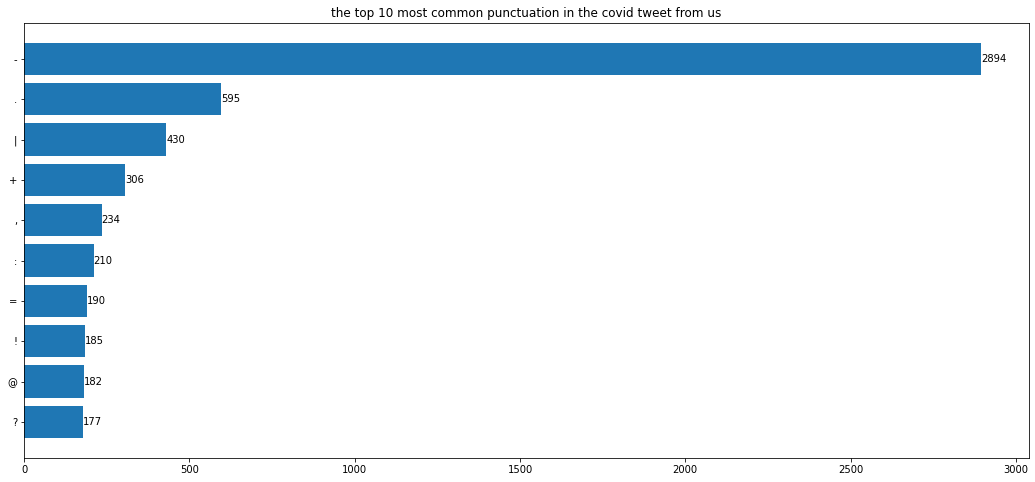

In [181]:
most_common_punctuation(train, 'us', 10)

### most common stopwords

In [182]:
def most_common_stopwords(data, country, number):
    dic_ = defaultdict(int)
    corpus = create_corpus(data, country)
    for a in corpus:
        if a in stopwords.words('english'):
            dic_[a] += 1
    top_ = sorted(dic_.items(), key = lambda x:x[1], reverse=True)[:number]
    top_.reverse()
    x,y = zip(*top_)
    plt.barh(x,y)
    ax = plt.gca()
    for a in ax.containers:
        plt.bar_label(a)
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.title(f'the top {number} most common stopwords in the covid tweet from {country}')

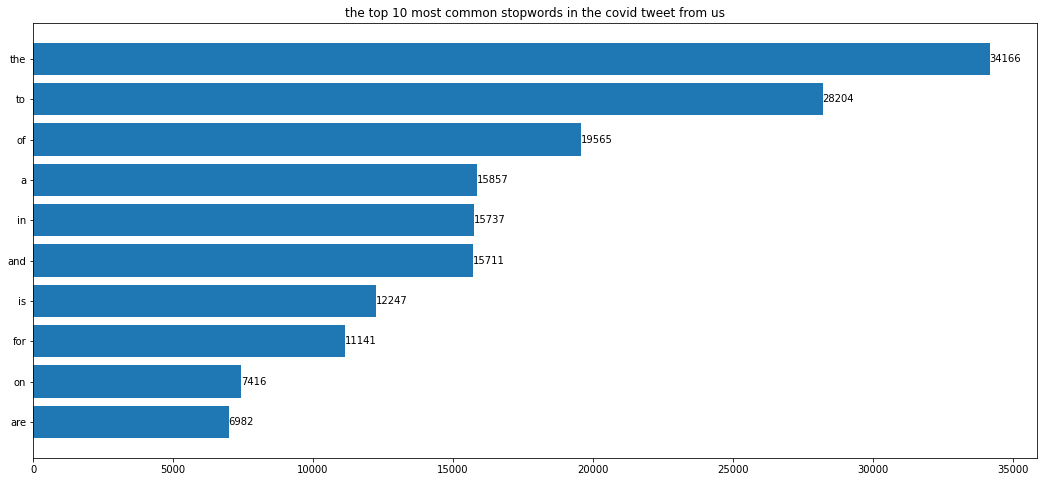

In [186]:
most_common_stopwords(train, 'us', 10)

### most common words

In [187]:
def most_common_words(data, country, number):
    dic_ = defaultdict(int)
    corpus = create_corpus(data, country)
    for a in corpus:
        if a not in stopwords.words('english'):
            if a not in string.punctuation:
                dic_[a] += 1
    top_ = sorted(dic_.items(), key = lambda x:x[1], reverse=True)[:number]
    top_.reverse()
    x,y = zip(*top_)
    plt.barh(x,y)
    ax = plt.gca()
    for a in ax.containers:
        plt.bar_label(a)
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.title(f'the top {number} most common words in the covid tweet from {country}')

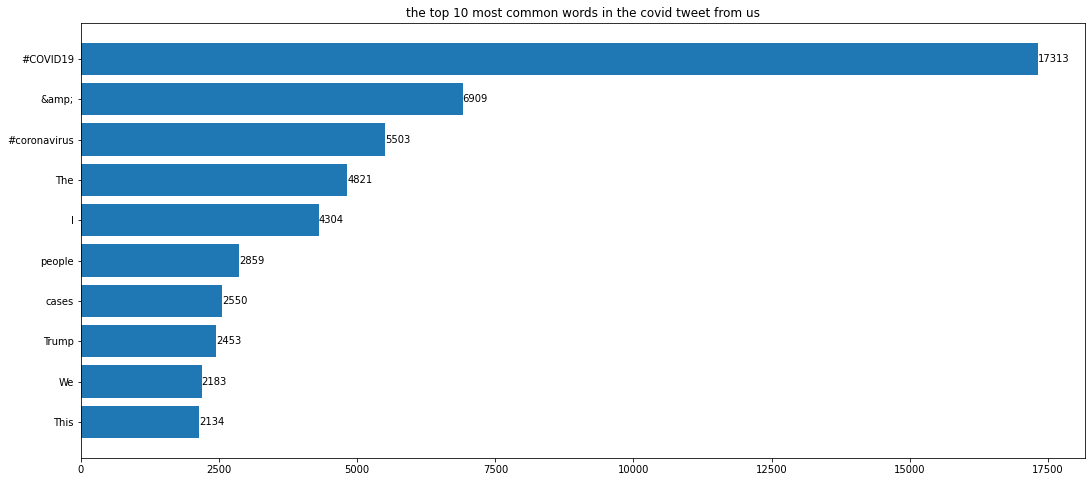

In [189]:
most_common_words(train, 'us', 10)

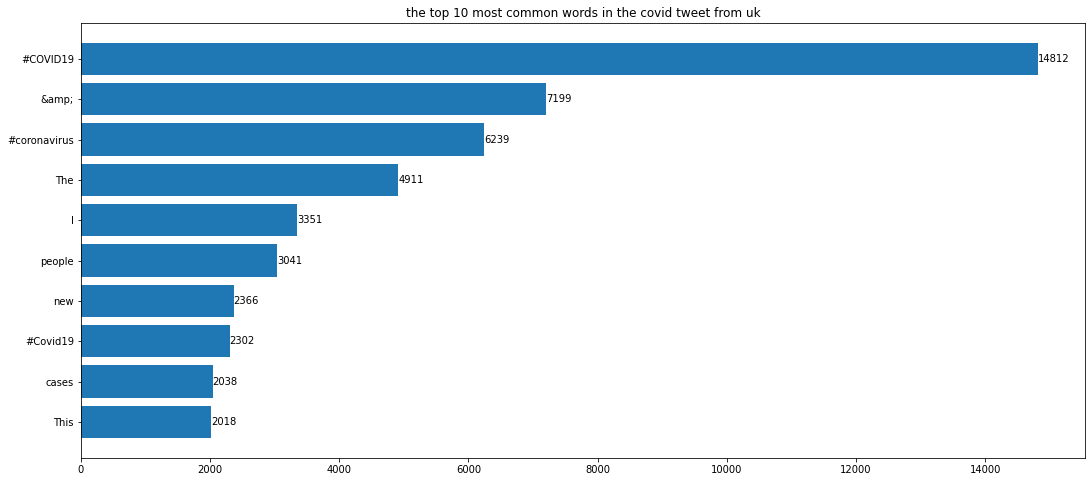

In [190]:
most_common_words(train, 'uk', 10)

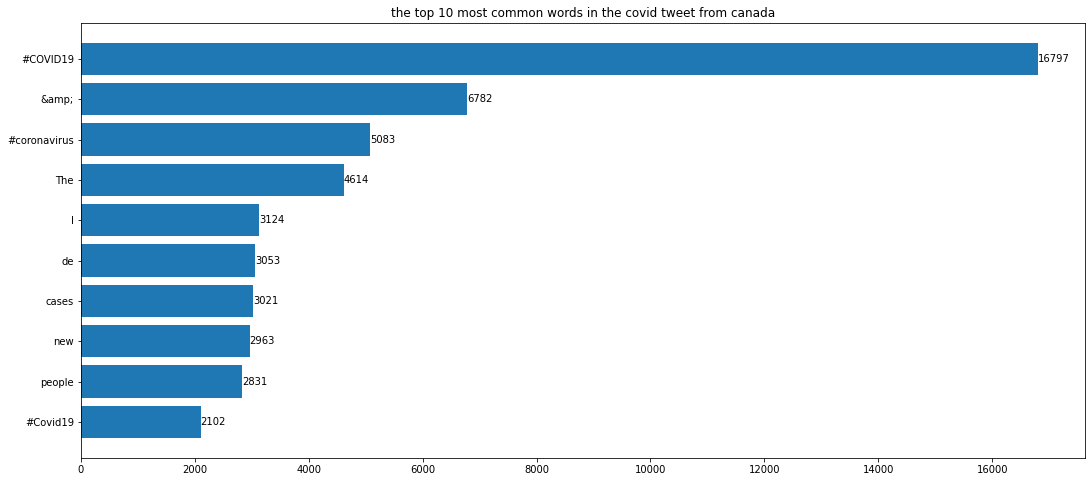

In [191]:
most_common_words(train, 'c', 10)

### most common bigrams

In [203]:
def most_common_bigrams(data, country, number):
    corpus = create_corpus(data, country)
    vectorizer=CountVectorizer(ngram_range=(2,2))
    bow = vectorizer.fit_transform(corpus)
    bigram_counts = [(word, bow.sum(axis=0)[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
    top_ = sorted(bigram_counts, key=lambda x:x[1], reverse=True)[:number]
    top_.reverse()
    x,y = zip(*top_)
    plt.barh(x, y)
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    fig = plt.gcf()
    fig.set_size_inches(18,8)
    plt.title(f'the top {number} most coummon bigrams in the covid tweets from {country}')

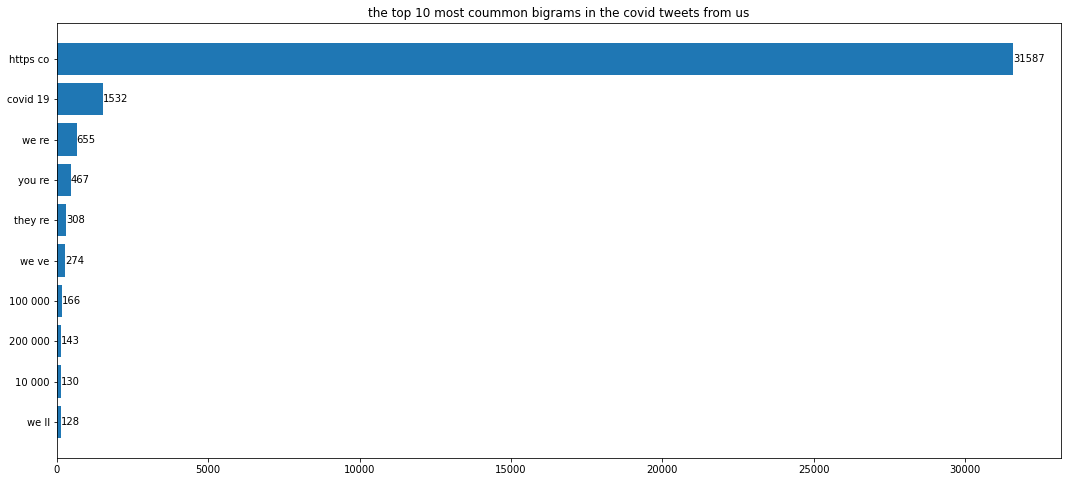

In [204]:
most_common_bigrams(train, 'us', 10)

### build a wordcloud

In [212]:
def build_wordcloud(data, country):
    corpus = create_corpus(data, country)
    wordcloud = WordCloud(background_color = 'white', height=800, width=1500, colormap='viridis').generate(' '.join(corpus))
    plt.imshow(wordcloud)
    fig = plt.gcf()
    fig.set_size_inches(12,8)

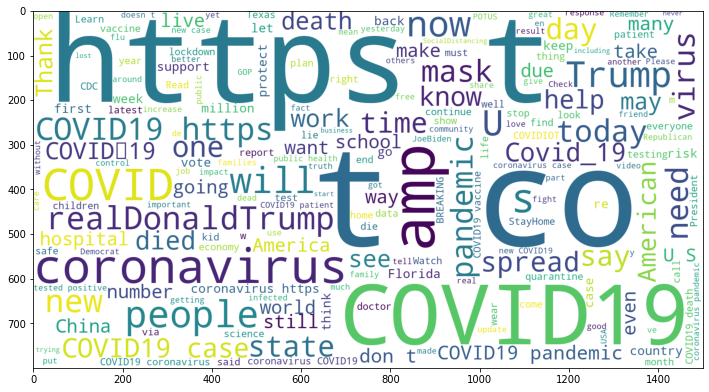

In [213]:
build_wordcloud(train, 'us')

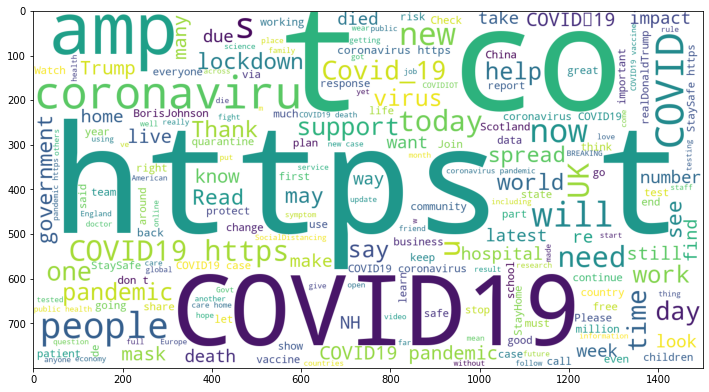

In [214]:
build_wordcloud(train, 'uk')

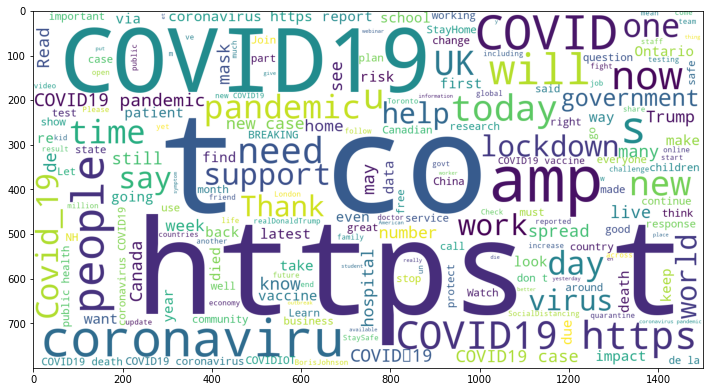

In [215]:
build_wordcloud(train, 'canada')

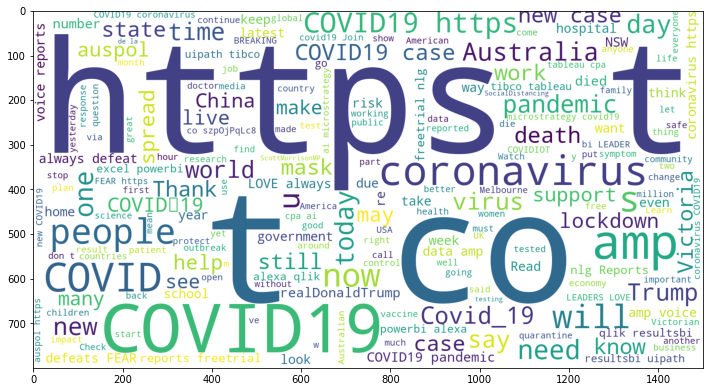

In [216]:
build_wordcloud(train, 'australia')